CROP RECCOMENDATION CHECKER </br>




by-  </br>
I028-Himanish Goel </br>
I027-Divya Athalye </br>
B-tech-AI, Batch-1

In [89]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd
import numpy as np
from sklearn import preprocessing
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import json

Importing data

In [90]:
df=pd.read_csv(r"Crop_recommendation.csv")

In [91]:
df

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,label,Unnamed: 8,Unnamed: 9
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,NaN,NaN
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,NaN,NaN
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,NaN,NaN
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,NaN,NaN
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,NaN,NaN
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,NaN,NaN
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,NaN,NaN
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,NaN,NaN


In [92]:
df.columns

Index(['Nitrogen', 'phosphorus', 'potassium', 'temperature', 'humidity', 'ph',
       'rainfall', 'label', 'Unnamed: 8', 'Unnamed: 9'],
      dtype='object')

Cleaning Data

In [93]:
df=df.drop(columns=['Unnamed: 8', 'Unnamed: 9'])

In [94]:
df

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [95]:
df=df.dropna(axis=0)

In [96]:
df

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [97]:
df.describe()

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


Assigning Colums

In [98]:
X = df[['Nitrogen', 'phosphorus', 'potassium', 'temperature', 'humidity', 'ph','rainfall']][:]

In [99]:
X

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [100]:
y = df[['label']][:]

In [101]:
y

,label
0,rice
1,rice
2,rice
3,rice
4,rice
...,...
2195,coffee
2196,coffee
2197,coffee
2198,coffee


Label Encoding

In [102]:
label=np.unique(y)

In [103]:
for j in range(len(label)):
    y=y.replace(label[j],j)
#end of label encoding

In [104]:
label

array(['apple', 'banana', 'blackgram', 'chickpea', 'coconut', 'coffee',
       'cotton', 'grapes', 'jute', 'kidneybeans', 'lentil', 'maize',
       'mango', 'mothbeans', 'mungbean', 'muskmelon', 'orange', 'papaya',
       'pigeonpeas', 'pomegranate', 'rice', 'watermelon'], dtype=object)

In [105]:
len(label)

22

In [106]:
np.unique(y)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21], dtype=int64)

In [107]:
y

,label
0,20
1,20
2,20
3,20
4,20
...,...
2195,5
2196,5
2197,5
2198,5


Splitting data

In [108]:
X

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [109]:
y

,label
0,20
1,20
2,20
3,20
4,20
...,...
2195,5
2196,5
2197,5
2198,5


Visualisations

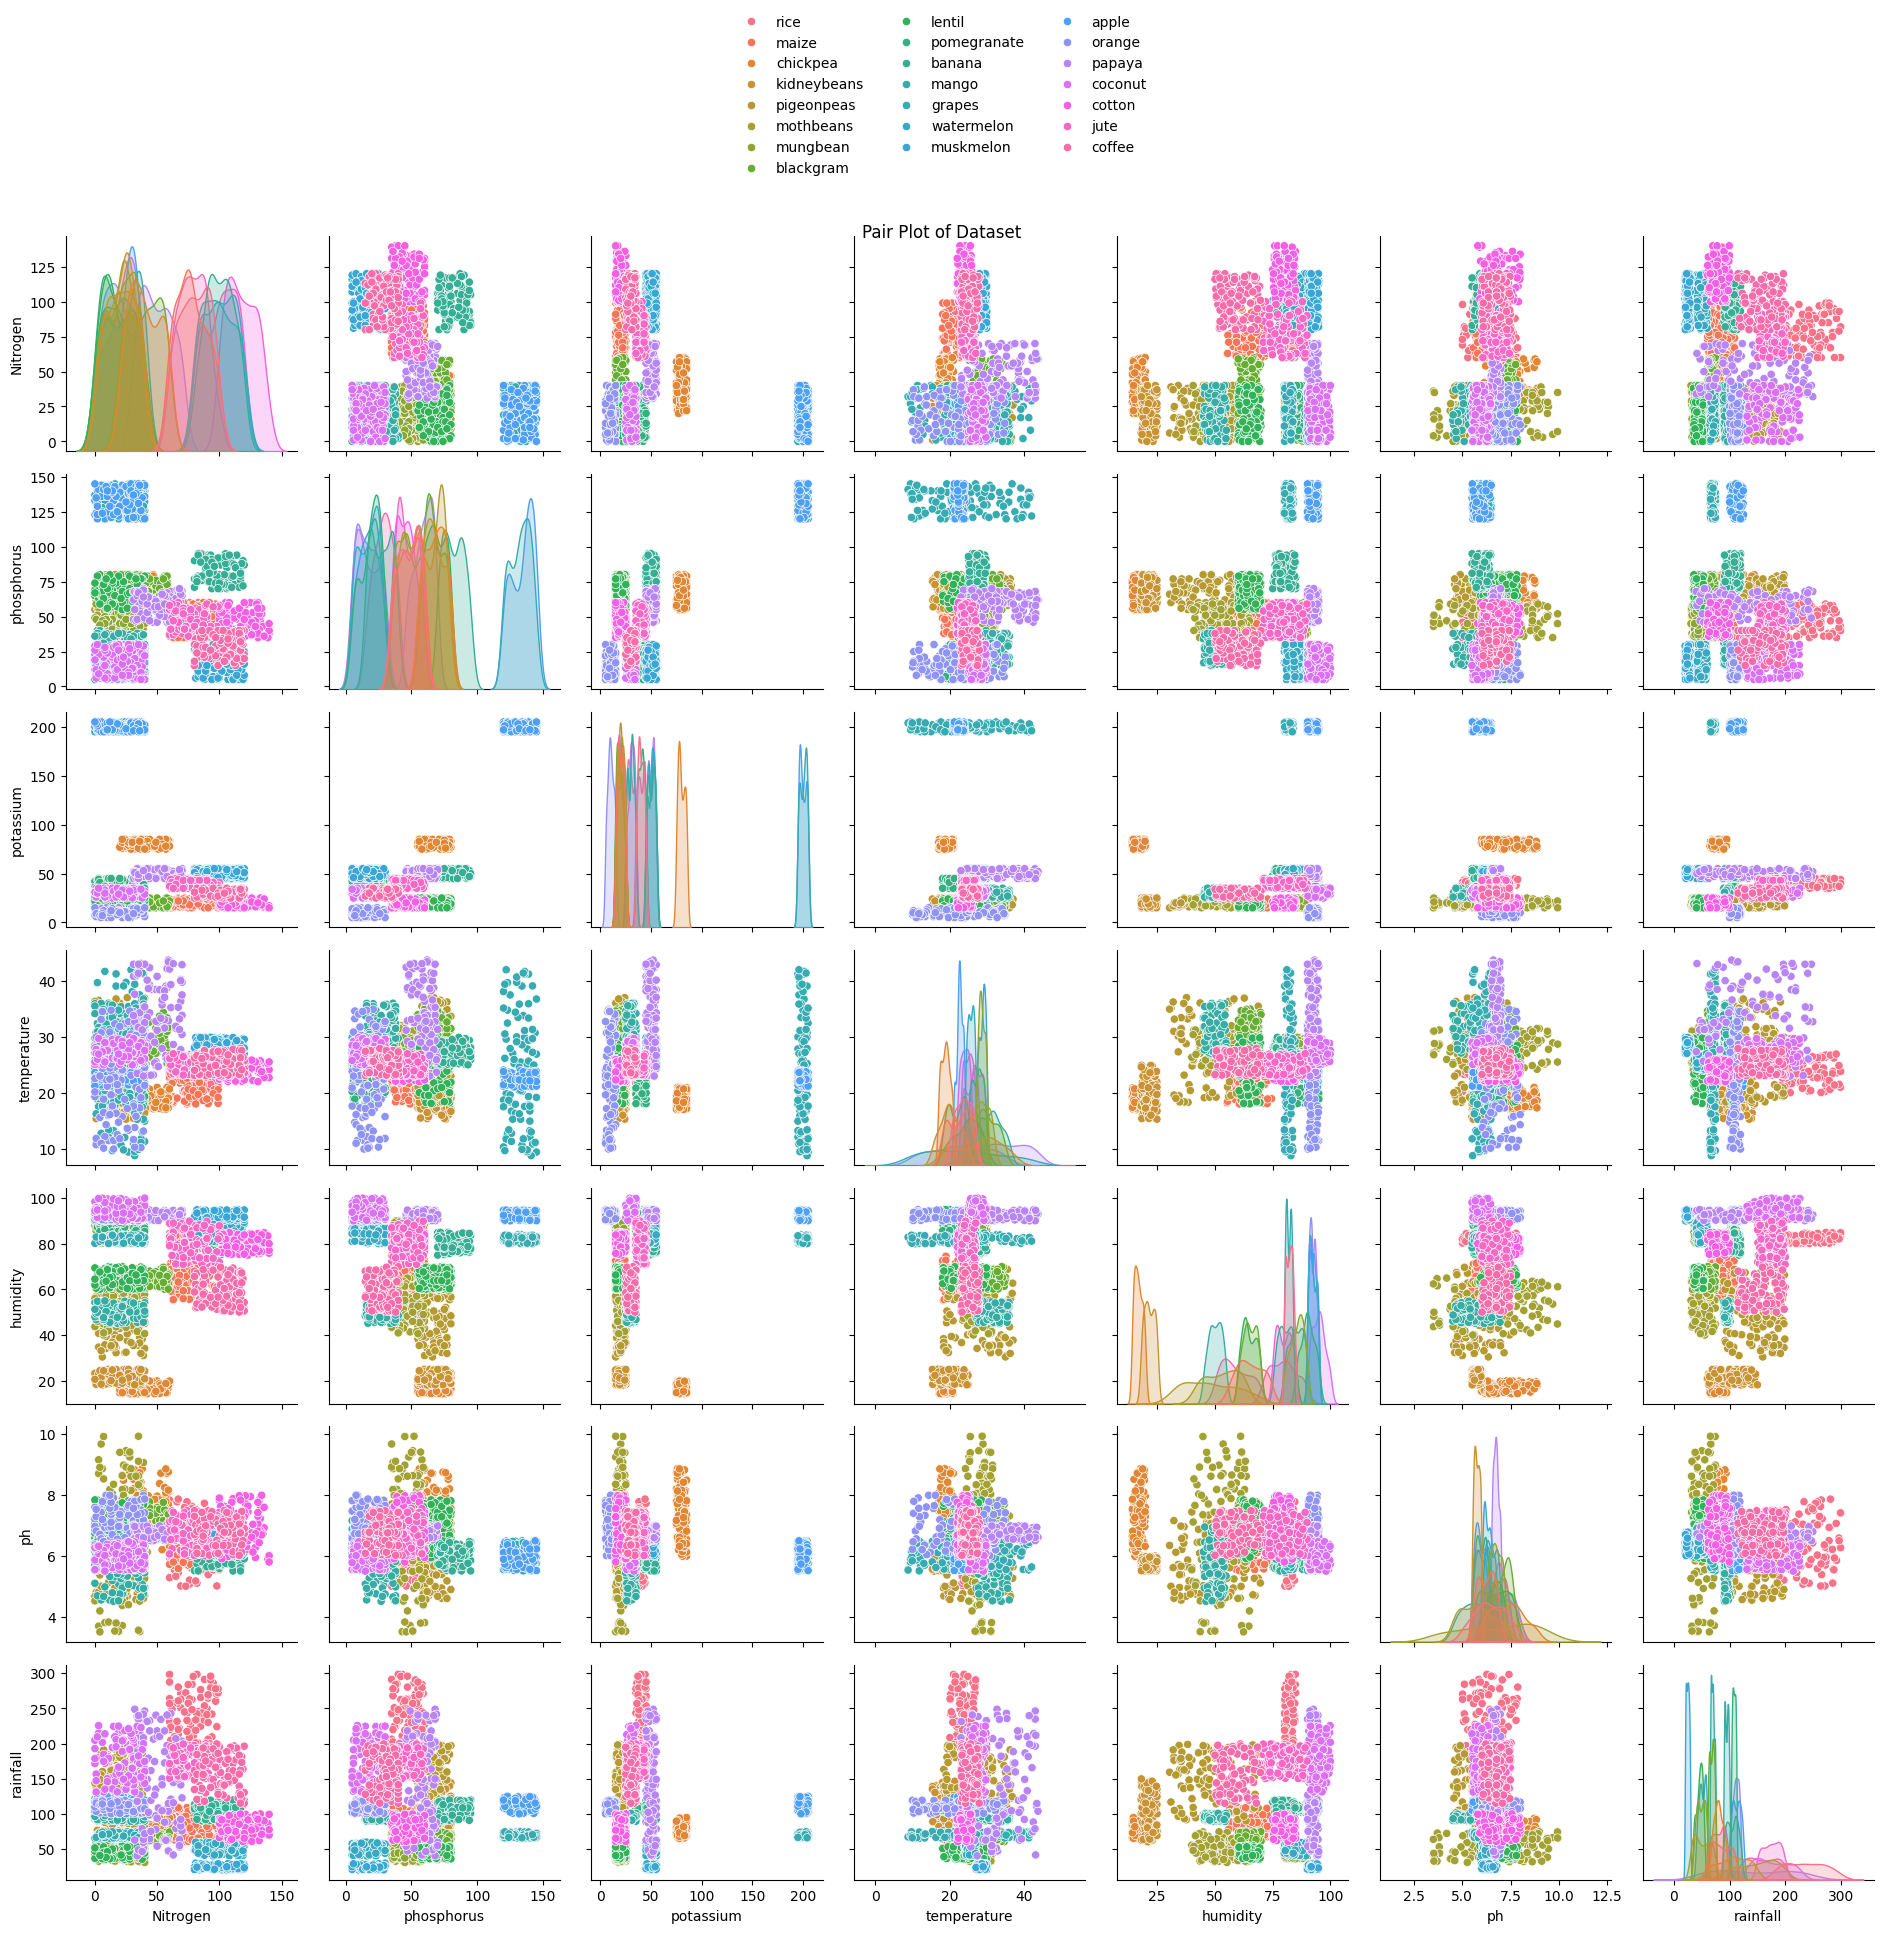

In [110]:
ax = sns.pairplot(df, hue='label')
plt.suptitle("Pair Plot of Dataset")
sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False)
plt.tight_layout()
plt.show()

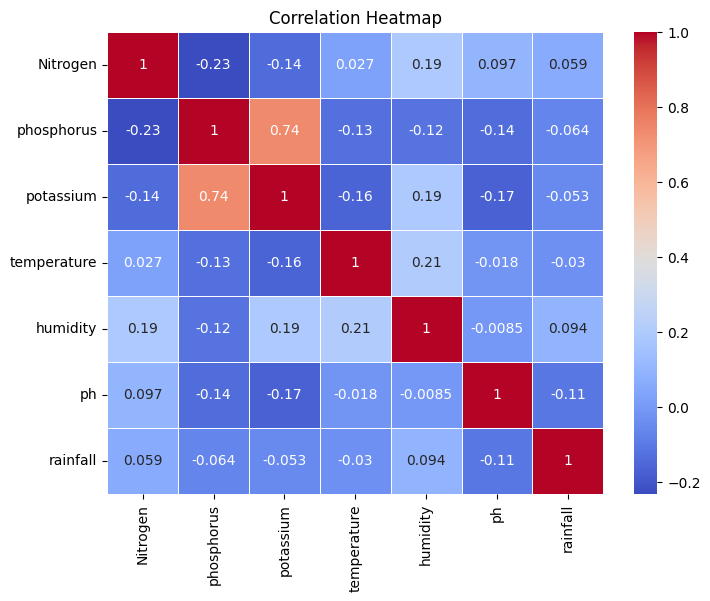

In [111]:
correlation_matrix = df.corr(numeric_only = True)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [113]:
X_train.shape

(1760, 7)

Grid search and hyperparameters

In [114]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [115]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': np.arange(0.5,10,0.5),
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,100]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'naive_bayes_gaussian': {
        'model': GaussianNB(),
        'params': {}
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini','entropy'],
            
        }
    }     
}

In [116]:
from sklearn.model_selection import GridSearchCV
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False,n_jobs=5)
    clf.fit(X, y.values.ravel())
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df2 = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df2

,model,best_score,best_params
0,svm,0.985455,"{'C': 5.5, 'kernel': 'linear'}"
1,random_forest,0.994091,{'n_estimators': 100}
2,logistic_regression,0.961364,{'C': 10}
3,naive_bayes_gaussian,0.995000,{}
4,decision_tree,0.988636,{'criterion': 'gini'}


Applying random forests

In [117]:
RF = RandomForestClassifier(n_estimators=100)
RF.fit(X_train, y_train.values.ravel())

RandomForestClassifier()

In [118]:
predictions_RF = RF.predict(X_test)

In [119]:
conf_RF = confusion_matrix(y_test, predictions_RF)

In [120]:
accuracy_RF=accuracy_score(y_test,predictions_RF)
accuracy_RF

0.9931818181818182

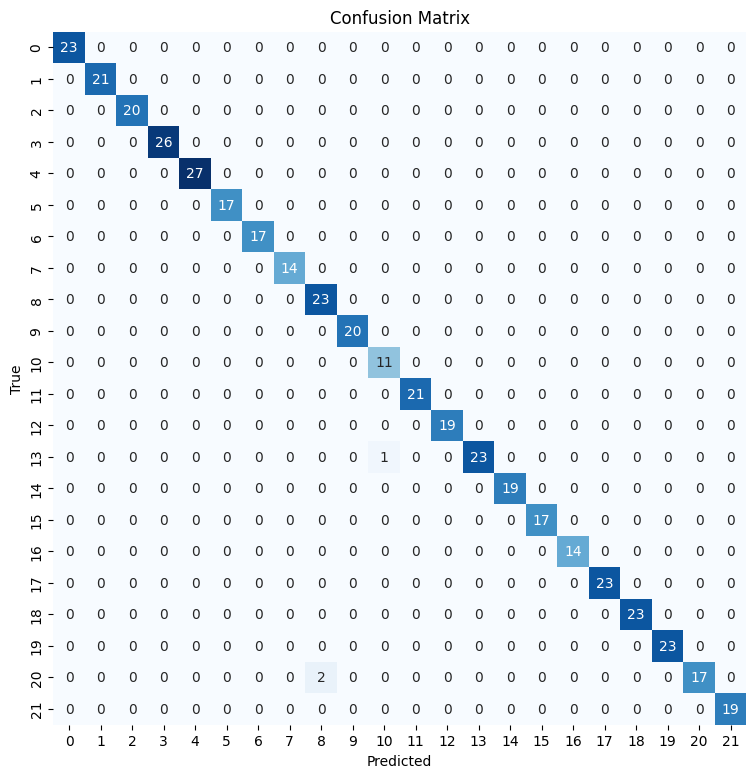

In [121]:
plt.figure(figsize=(9, 9))
sns.heatmap(conf_RF, annot=True, fmt="d", cmap="Blues", cbar=False, square=True)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [122]:
feature_names = ['Nitrogen', 'phosphorus', 'potassium', 'temperature', 'humidity', 'ph', 'rainfall']

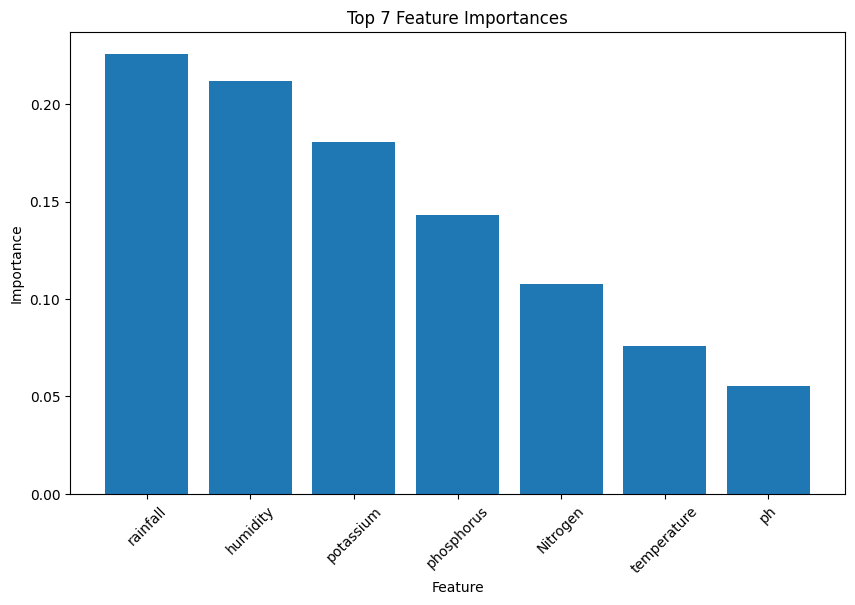

In [123]:
feature_importances = RF.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1][:7]  # Top 7 features
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_indices)), feature_importances[sorted_indices])
plt.xticks(range(len(sorted_indices)), np.array(feature_names)[sorted_indices], rotation=45)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Top 7 Feature Importances')
plt.show()

Applying GaussianNB

In [124]:
NB= GaussianNB()
NB.fit(X_train, y_train.values.ravel())

GaussianNB()

In [125]:
predictions_NB = NB.predict(X_test)

In [126]:
conf_NB = confusion_matrix(y_test, predictions_NB)

In [127]:
accuracy_NB=accuracy_score(y_test,predictions_NB)
accuracy_NB

0.9954545454545455

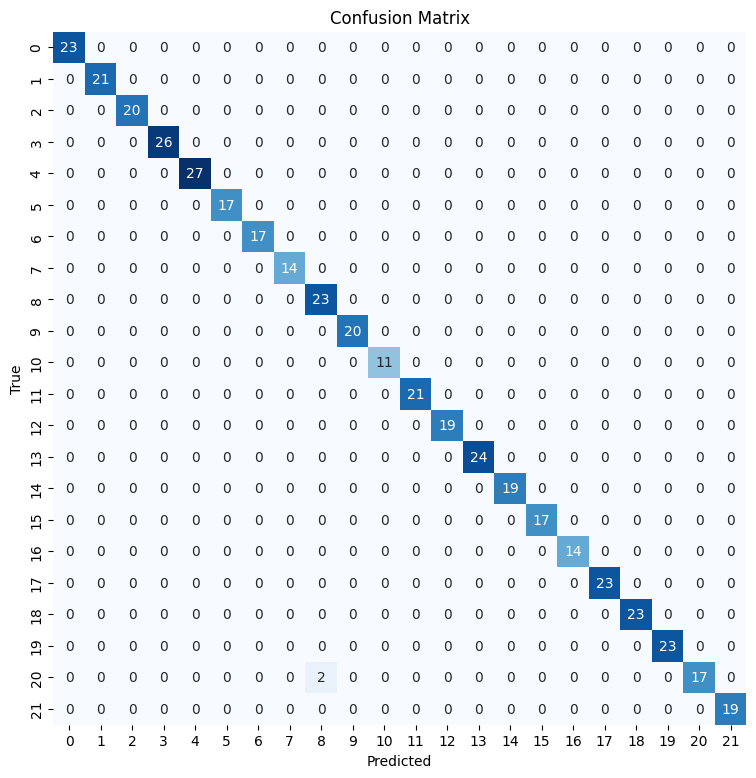

In [128]:
plt.figure(figsize=(9, 9))
sns.heatmap(conf_NB, annot=True, fmt="d", cmap="Blues", cbar=False, square=True)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

Applying Logistic Regression

In [129]:
LR= LogisticRegression(solver='liblinear',multi_class='auto',C=10)
LR.fit(X_train, y_train.values.ravel())

LogisticRegression(C=10, solver='liblinear')

In [130]:
predictions_LR = LR.predict(X_test)

In [131]:
conf_LR = confusion_matrix(y_test, predictions_LR)

In [132]:
accuracy_LR=accuracy_score(y_test,predictions_LR)
accuracy_LR

0.9454545454545454

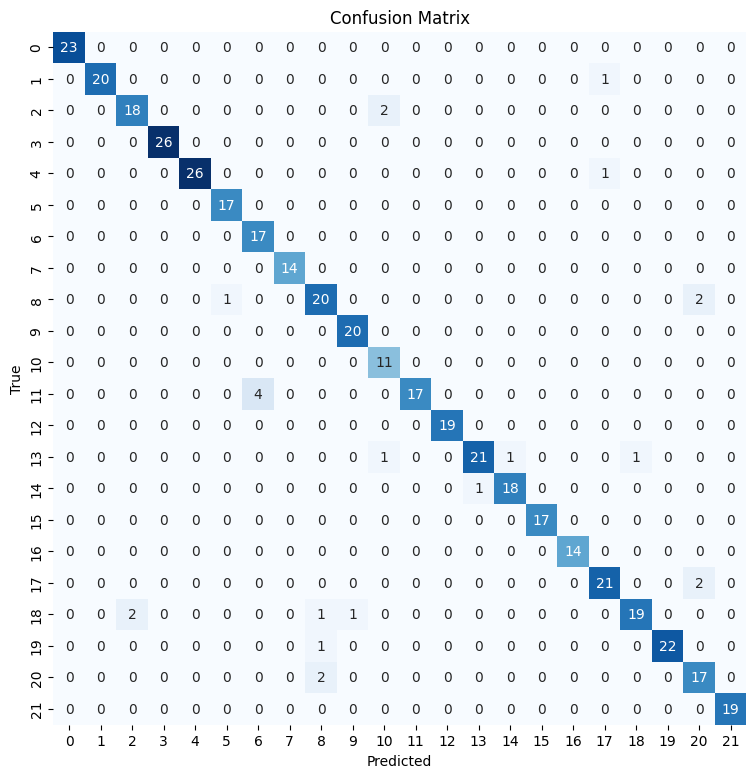

In [133]:
plt.figure(figsize=(9, 9))
sns.heatmap(conf_LR, annot=True, fmt="d", cmap="Blues", cbar=False, square=True)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

Applying SVM

In [134]:
SVM= svm.SVC(kernel="linear",C=5.5)
SVM.fit(X_train, y_train.values.ravel())

SVC(C=5.5, kernel='linear')

In [135]:
predictions_SVM = SVM.predict(X_test)

In [136]:
conf_SVM = confusion_matrix(y_test, predictions_SVM)

In [137]:
accuracy_SVM=accuracy_score(y_test,predictions_SVM)
accuracy_SVM

0.9795454545454545

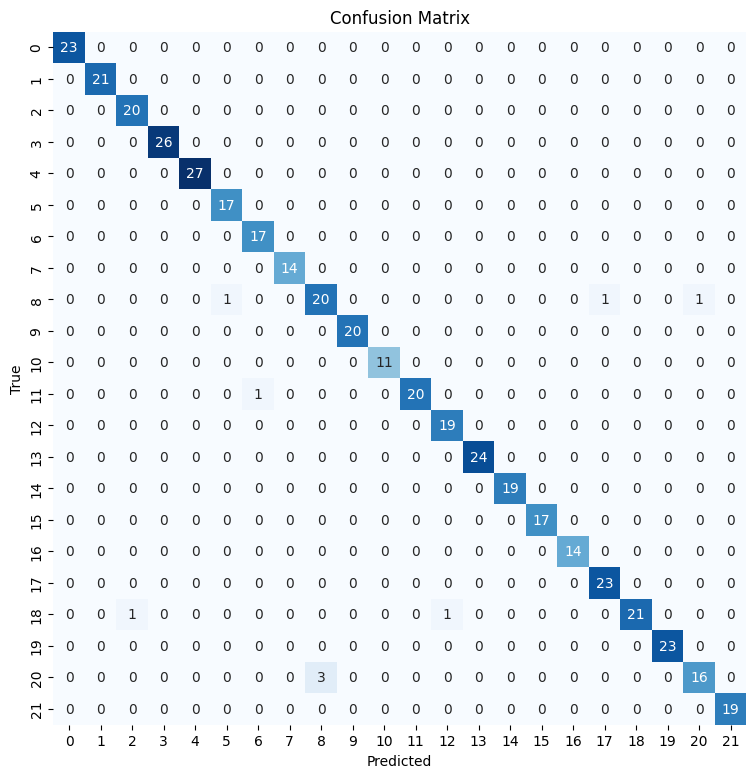

In [138]:
plt.figure(figsize=(9, 9))
sns.heatmap(conf_SVM, annot=True, fmt="d", cmap="Blues", cbar=False, square=True)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

Applying Decision Trees

In [139]:
DT= DecisionTreeClassifier(criterion='gini')
DT.fit(X_train, y_train.values.ravel())

DecisionTreeClassifier()

In [140]:
predictions_DT = DT.predict(X_test)

In [141]:
conf_DT = confusion_matrix(y_test, predictions_DT)

In [142]:
accuracy_DT=accuracy_score(y_test,predictions_DT)
accuracy_DT

0.9840909090909091

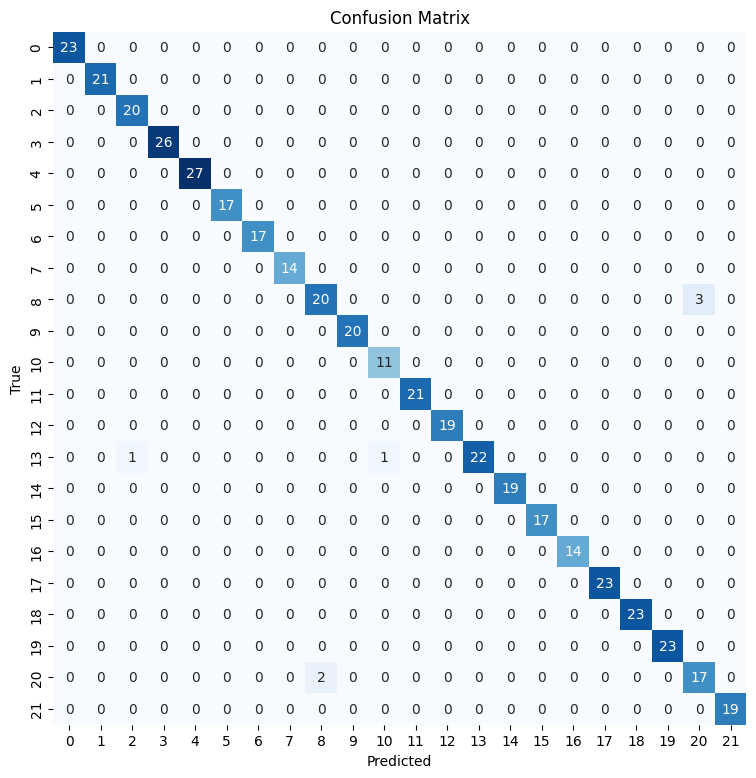

In [143]:
plt.figure(figsize=(9, 9))
sns.heatmap(conf_DT, annot=True, fmt="d", cmap="Blues", cbar=False, square=True)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

Combining all models (kinda like bagging)

In [144]:
best_of_all=np.vstack([predictions_SVM,predictions_RF,predictions_DT,predictions_LR,predictions_DT,predictions_NB])

In [145]:
best_of_all

array([[15, 21, 17, ...,  6,  6, 18],
       [15, 21, 17, ...,  6,  6, 18],
       [15, 21, 17, ...,  6,  6, 18],
       [15, 21, 17, ...,  6,  6, 18],
       [15, 21, 17, ...,  6,  6, 18],
       [15, 21, 17, ...,  6,  6, 18]], dtype=int64)

In [146]:
def most_frequent_column_elements(matrix):
    
    most_frequent_elements = []
    

    for col in matrix.T:

        unique_elements, counts = np.unique(col, return_counts=True)
        

        max_count_index = np.argmax(counts)
        

        most_frequent_elements.append(unique_elements[max_count_index])
    

    return np.array(most_frequent_elements)

In [147]:
combined_output=most_frequent_column_elements(best_of_all)

In [148]:
accuracy_CO=accuracy_score(y_test,combined_output)
accuracy_CO

0.990909090909091

In [149]:
conf_CO = confusion_matrix(y_test, combined_output)

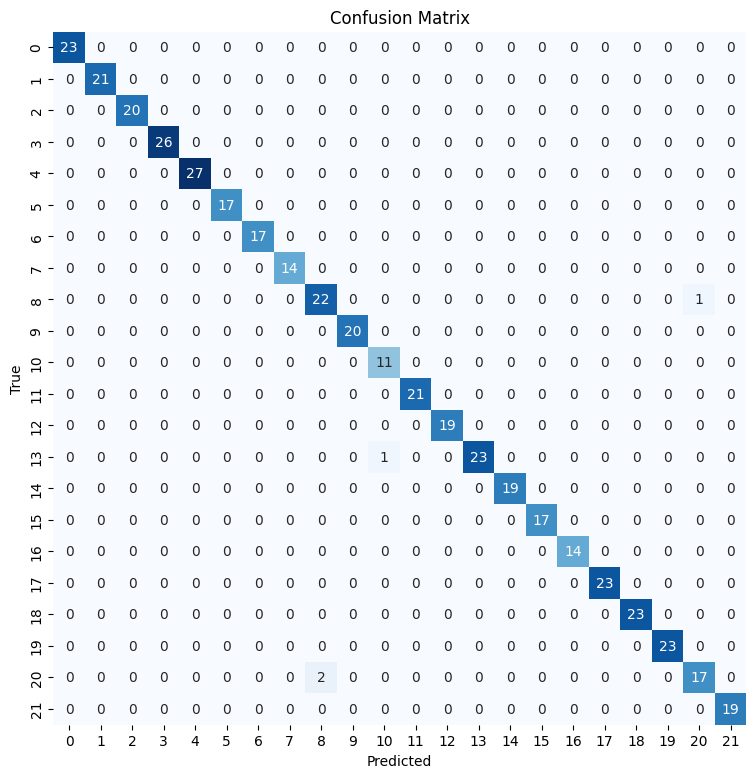

In [150]:
plt.figure(figsize=(9, 9))
sns.heatmap(conf_CO, annot=True, fmt="d", cmap="Blues", cbar=False, square=True)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [151]:
def conf_mat(conf):
    num_classes = conf.shape[0]
    tp_list = []
    fn_list = []
    fp_list = []
    tn_list = []
    for i in range(num_classes):
        # True Positive (TP)
        tp = conf[i, i]
        tp_list.append(tp)

        # False Negative (FN)
        fn = np.sum(conf[i, :]) - tp
        fn_list.append(fn)

        # False Positive (FP)
        fp = np.sum(conf[:, i]) - tp
        fp_list.append(fp)

        # True Negative (TN)
        tn = np.sum(conf) - tp - fp - fn
        tn_list.append(tn)
    final_matrix=np.array([[tp_list,fp_list],[fp_list,tn_list]])
    return final_matrix

In [152]:
Nconf_CO=conf_mat(conf_CO)
Nconf_DT=conf_mat(conf_DT)
Nconf_LR=conf_mat(conf_LR)
Nconf_RF=conf_mat(conf_RF)
Nconf_NB=conf_mat(conf_NB)
Nconf_SVM=conf_mat(conf_SVM)

In [153]:
report_CO = classification_report(y_test, combined_output)
report_DT = classification_report(y_test, predictions_DT)
report_LR = classification_report(y_test, predictions_LR)
report_RF = classification_report(y_test, predictions_RF)
report_NB = classification_report(y_test, predictions_NB)
report_SVM = classification_report(y_test, predictions_SVM)

In [154]:
# with open('report_DT.json', 'w') as f:
#     json.dump(report_DT, f)

In [155]:
# with open('report_LR.json', 'w') as f:
#     json.dump(report_LR, f)

In [156]:
# with open('report_RF.json', 'w') as f:
#     json.dump(report_RF, f)

In [157]:
# with open('report_NB.json', 'w') as f:
#     json.dump(report_NB, f)

In [158]:
# with open('report_SVM.json', 'w') as f:
#     json.dump(report_SVM, f)

In [159]:
# with open('report_CO.json', 'w') as f:
#     json.dump(report_CO, f)

In [160]:
# with open('RF.pkl', 'wb') as f:
#     pickle.dump(RF, f) 

In [161]:
# with open('NB.pkl', 'wb') as f:
#     pickle.dump(NB, f) 

In [162]:
# with open('LR.pkl', 'wb') as f:
#     pickle.dump(LR, f) 

In [163]:
# with open('SVM.pkl', 'wb') as f:
#     pickle.dump(SVM, f) 

In [164]:
# with open('DT.pkl', 'wb') as f:
#     pickle.dump(DT, f) 

test

In [165]:
new_input = np.array([[140,40,17,22.72767171,77.07598065,6.006085786,77.55176318]])


predicted_crop = RF.predict(new_input)
print("Predicted crop:", label[predicted_crop])

Predicted crop: ['cotton']


c:\Users\himan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [166]:
predicted_crop = LR.predict(new_input)
print("Predicted crop:", label[predicted_crop])

Predicted crop: ['cotton']


c:\Users\himan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [167]:
predicted_crop = SVM.predict(new_input)
print("Predicted crop:", label[predicted_crop])

Predicted crop: ['cotton']


c:\Users\himan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [168]:
predicted_crop = NB.predict(new_input)
print("Predicted crop:", label[predicted_crop])

Predicted crop: ['cotton']


c:\Users\himan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [169]:
predicted_crop = DT.predict(new_input)
print("Predicted crop:", label[predicted_crop])

Predicted crop: ['cotton']


c:\Users\himan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
